In [20]:
#Import the data.
#Import the required libraries

import pandas as pd
import os.path as osp
import statsmodels.api as sm
from statsmodels.formula.api import ols

data_path = osp.join(osp.curdir,'byYEAR,hood,BREAK&ENTER.csv')
data = pd.read_csv(data_path)
data

,Number_Of_Crime,OCC_YEAR,Neighbourhood_Name,Neighbourhood_Number,Total_Age_groups_of_the_population,Married_CommonLaw_Rate,Education_Rate,Employment_rate,Average_age,Average_total_income_in_2020
0,73,2019,Etobicoke City Centre,159,23600,45.487288,42.394068,65.4,39.4,57750
1,60,2019,Woburn North,142,26580,44.018059,29.063205,50.5,40.1,40000
2,47,2019,Cliffcrest,123,16130,45.412275,29.014259,50.7,42.1,53600
3,118,2019,Yonge-Bay Corridor,170,12645,38.078292,66.231712,64.0,34.5,68200
4,55,2019,East Willowdale,152,15485,48.659994,47.659025,48.9,41.6,61500
...,...,...,...,...,...,...,...,...,...,...
785,25,2023,Henry Farm,53,19840,44.984879,47.807460,61.1,35.7,49360
786,15,2023,Markland Wood,12,10365,50.265316,35.021708,50.6,47.5,71900
787,33,2023,Fort York-Liberty Village,163,19915,43.861411,62.791865,79.3,34.9,76100
788,7,2023,Old East York,58,9160,47.379913,31.168122,56.3,43.0,63800


In [21]:
#Build our model using statsmodels
breakenter_model = ols('Number_Of_Crime ~ OCC_YEAR + Total_Age_groups_of_the_population + Married_CommonLaw_Rate + \
Education_Rate + Employment_rate + Average_age + Average_total_income_in_2020',data).fit()
print(breakenter_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Number_Of_Crime   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     83.44
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           2.07e-90
Time:                        23:05:24   Log-Likelihood:                -3706.9
No. Observations:                 790   AIC:                             7430.
Df Residuals:                     782   BIC:                             7467.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [22]:
# R-squqared:  0.428
# P value for F-test: 2.07e-90 - model is siginificant
# p value for T test:

# OCC_YEAR: 0.10
# Total_Age_groups_of_the_population: 0.000     
# Married_CommonLaw_Rate:  0.000
# Education_Rate: 0.000
# Employment_rate: 0.000      
# Average_age: 0.000
# Average_total_income_in_2020: 0.000

# all variables significant


In [23]:
#Import the required package from sklearn
from sklearn.linear_model import LinearRegression

train_X = data[['OCC_YEAR', 'Total_Age_groups_of_the_population', 'Married_CommonLaw_Rate', 'Education_Rate', 'Employment_rate', 'Average_age', 'Average_total_income_in_2020']].values
train_y = data['Number_Of_Crime'].values


# Fitting data to a regression model requires 

reg = LinearRegression().fit(train_X, train_y)

### Residual vs Fitted value 

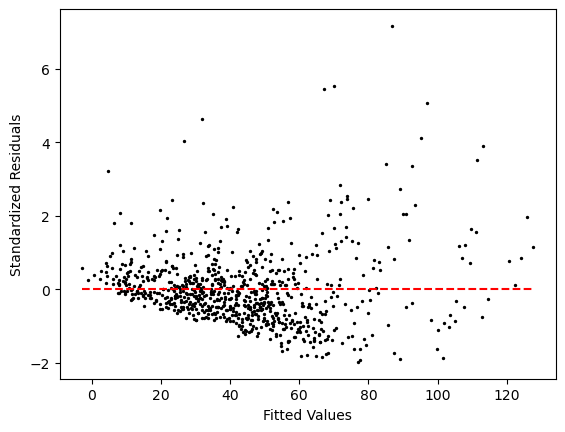

Mean of Residuals: -4.93314531278101e-13


In [24]:
### Residual vs Fitted value - check for patterns and distribution of points around 0 on the y-axis


%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

#Residuals calculated by definition above.
predicted_y = reg.predict(train_X)
#Note we can perform element-wise subtraction between arrays like so
residuals = train_y - predicted_y

# First we create an array of normalized residuals using a Scikit function
scaler = StandardScaler().fit(residuals.reshape(-1,1))
norm_residuals = scaler.transform(residuals.reshape(-1,1))

# Plot and take the root and absolute values of the norms
plt.scatter(reg.predict(train_X),norm_residuals,c='black',s=2)

#This line adds the dashed horizontal line
plt.hlines(0,min(predicted_y),max(predicted_y),color='red',linestyles='dashed')
plt.xlabel("Fitted Values")
plt.ylabel("Standardized Residuals")
plt.show()

print('Mean of Residuals:',residuals.mean())


In [25]:
# the Residual vs Fitted values graph is cone-shaped 
# the Mean of Residuals: -4.93314531278101e-13

## You can see here that as the predicted value of Y increases, the variance of the residual also increases. 
## By producing a ‘residuals by regressor’ plot by you can gain more insight into where the heteroskedasticity originates.

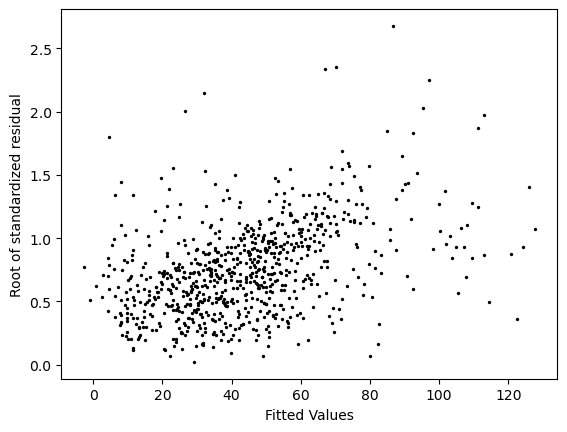

In [26]:
### Scale-location plot - check for assumptions of homoscedasticity

# this is cone shaped:  this implies that there is heteroskedasticity 

from sklearn.preprocessing import StandardScaler

# First we create an array of normalized residuals using a Scikit function
scaler = StandardScaler().fit(residuals.reshape(-1,1))
norm_residuals = scaler.transform(residuals.reshape(-1,1))

# Plot and take the root and absolute values of the norms
plt.scatter(predicted_y,np.sqrt(np.abs(norm_residuals)),c='black',s=2)
plt.xlabel("Fitted Values")
plt.ylabel("Root of standardized residual")
plt.show()

In [27]:
# Breuch-Pagan Test for heteroskedasticity 

#Import the relevant libraries and train the model
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan

#Perform the Breuch-Pagan Test by running this line
bp = het_breuschpagan(breakenter_model.resid,breakenter_model.model.exog)
measures = ('LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value')
print(dict(zip(measures,bp)))

{'LM Statistic': 64.43504300648839, 'LM-Test p-value': 1.9529659972959947e-11, 'F-Statistic': 9.920979141917828, 'F-Test p-value': 6.700024124382096e-12}


In [28]:
# The results of the Breusch-Pagan test will be a tuple of 4 values. 
# The ones we are concerned about are the p-values. 

# 'LM-Test p-value': 1.9529659972959947e-11
# 'F-Test p-value': 6.700024124382096e-12

# They are both less than 0.05, the model is found to be heteroskedastic.

In [29]:
# Applying HCCME to correct the inteference in the regression 
# Used HC2 when data has greater than 250 observations.

corrected_model = breakenter_model.get_robustcov_results(cov_type = 'HC2')
print(corrected_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Number_Of_Crime   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     46.70
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           2.18e-55
Time:                        23:05:26   Log-Likelihood:                -3706.9
No. Observations:                 790   AIC:                             7430.
Df Residuals:                     782   BIC:                             7467.
Df Model:                           7                                         
Covariance Type:                  HC2                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [30]:
#### FINAL MODEL AFTER FIXING HETEROSKEDASTICITY ####
# R-squqared:  0.428
# P value for F-test:  2.18e-55 - model is siginificant
# p value for T test:

# OCC_YEAR: 0.020
# Total_Age_groups_of_the_population: 0.000     
# Married_CommonLaw_Rate:  0.000
# Education_Rate: 0.000
# Employment_rate: 0.001      
# Average_age: 0.000
# Average_total_income_in_2020: 0.000

# all variables significant


# Normal QQ plot

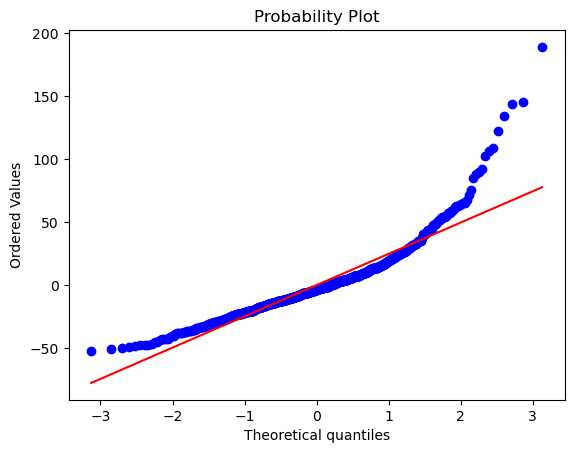

In [31]:
#Normal QQ plot

import scipy.stats as stats

fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(residuals,dist='norm',plot=ax)
plt.show()

# Influence plot

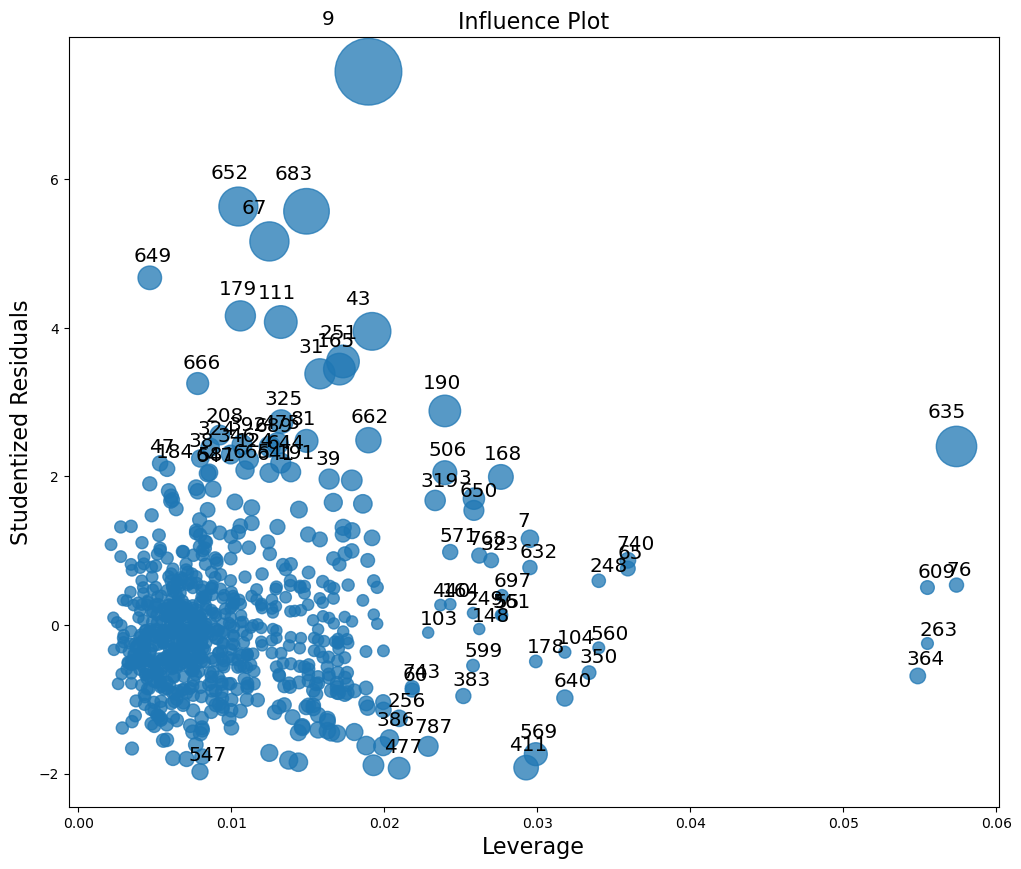

In [32]:
#Residuals vs Leverage
fig, ax = plt.subplots(figsize=(12,10))
fig = sm.graphics.influence_plot(breakenter_model, ax=ax, criterion="cooks")
plt.show()

# Density plot

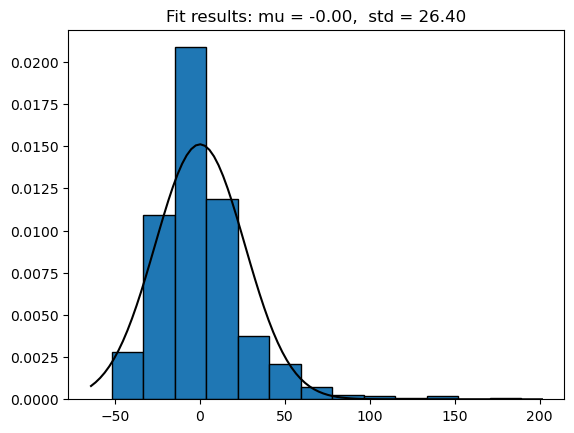

In [33]:
# density plot - to check for normality of errors

# this shows that there is normality issues as plot is not a normal distribution, it is a bit skewed

from scipy.stats import norm

# Fit a normal distribution to the data:
mean, std = norm.fit(residuals)

# Plot the histogram.
plt.hist(residuals, bins=13, edgecolor='black', density=True)

# Generate a PDF based on the fitted distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, color='black')
title = "Fit results: mu = %.2f,  std = %.2f" % (mean, std)
plt.title(title)

plt.show()

# Prediction number for crimes


In [34]:
# USE AVERAGE of each column
from statistics import mean
reg.predict(np.array([2024, mean(data['Total_Age_groups_of_the_population']), mean(data['Married_CommonLaw_Rate']), \
                      mean(data['Education_Rate']), mean(data['Employment_rate']), mean(data['Average_age']), \
                      mean(data['Average_total_income_in_2020'])]).reshape(1,-1))[0]

38.584177215190266